In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models



In [3]:

# Load the dataset from the CSV file
dataset = pd.read_csv('dataset.csv')

# Drop the 'totacc', 'mov', and 'prob' columns from the dataset
dataset = dataset.drop(['totacc', 'mov', 'prob'], axis=1)

# Create a new DataFrame with the remaining columns
df = pd.DataFrame(dataset)

# Print the first five rows of the new DataFrame
df.head()



,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
0,1682240261550,-8.699,-2.994,2.891,5.60,1.68,0.70,18.087,-71.617,-0.000977,0
1,1682240261653,-8.840,-2.824,2.905,1.19,0.14,0.21,16.881,-71.808,0.013672,0
2,1682240261764,-8.708,-3.011,2.826,-1.33,0.42,0.98,18.202,-72.020,0.039062,0
3,1682240261871,-8.704,-3.097,2.867,-0.49,0.77,0.77,18.672,-71.769,0.047607,0
4,1682240261977,-8.704,-2.955,2.776,-1.12,0.91,0.14,17.927,-72.311,0.039307,0


In [4]:
## SCALING ##
# Select all columns except the last one
cols_to_scale = df.columns[:-1]

# Apply the StandardScaler to the selected columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)

# Concatenate the scaled columns with the last column (not scaled)
df_scaled = pd.concat([df_scaled, df.iloc[:, -1]], axis=1)

df_scaled.describe()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
count,4.135000e+03,4.135000e+03,4.135000e+03,4.135000e+03,4135.000000,4.135000e+03,4.135000e+03,4.135000e+03,4.135000e+03,4.135000e+03,4135.000000
mean,-3.040735e-10,2.062035e-17,-8.248138e-17,5.155086e-17,0.000000,1.202853e-17,3.436724e-18,-5.842431e-17,5.155086e-18,-5.498759e-17,0.370496
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,0.482996
min,-1.526363e+00,-4.454933e+00,-7.033260e+00,-5.987140e+00,-8.548294,-7.122183e+00,-5.043594e+00,-4.739893e+00,-1.679684e+00,-2.667533e+00,0.000000
25%,-1.010856e+00,-7.243092e-01,-6.221750e-01,-7.175532e-01,-0.350618,-3.261153e-01,-3.186833e-01,-5.714003e-01,-5.687728e-01,-8.326364e-01,0.000000
50%,1.562652e-01,-5.991483e-01,2.702349e-01,3.344676e-01,0.026605,-1.417784e-01,-3.815743e-02,-2.507572e-01,-5.170300e-01,2.830542e-01,0.000000
75%,9.857442e-01,8.403447e-01,5.681325e-01,5.234009e-01,0.300465,3.534011e-01,2.003396e-01,6.178480e-01,1.138222e+00,6.570001e-01,1.000000
max,1.505914e+00,2.671502e+00,7.528570e+00,1.018915e+01,9.351156,9.417536e+00,8.505708e+00,2.970806e+00,2.202550e+00,7.020228e+00,1.000000


In [5]:
#df_scaled = df

In [6]:
# Separate the features from the target variable
X = df_scaled.drop(['status'], axis=1).values
y = df_scaled['status'].values

# Convert the target variable to binary values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for use in a CNN
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
207/207 [==============================] - 3s 9ms/step - loss: 0.5007 - accuracy: 0.7896 - val_loss: 0.4071 - val_accuracy: 0.8235
Epoch 2/10
207/207 [==============================] - 1s 4ms/step - loss: 0.3895 - accuracy: 0.8383 - val_loss: 0.3753 - val_accuracy: 0.8259
Epoch 3/10
207/207 [==============================] - 1s 4ms/step - loss: 0.3670 - accuracy: 0.8467 - val_loss: 0.3576 - val_accuracy: 0.8464
Epoch 4/10
207/207 [==============================] - 2s 8ms/step - loss: 0.3515 - accuracy: 0.8531 - val_loss: 0.3464 - val_accuracy: 0.8501
Epoch 5/10
207/207 [==============================] - 1s 4ms/step - loss: 0.3387 - accuracy: 0.8594 - val_loss: 0.3390 - val_accuracy: 0.8549
Epoch 6/10
207/207 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8628 - val_loss: 0.3290 - val_accuracy: 0.8646
Epoch 7/10
207/207 [==============================] - 1s 5ms/step - loss: 0.3219 - accuracy: 0.8688 - val_loss: 0.3257 - val_accuracy: 0.8694
Epoch 

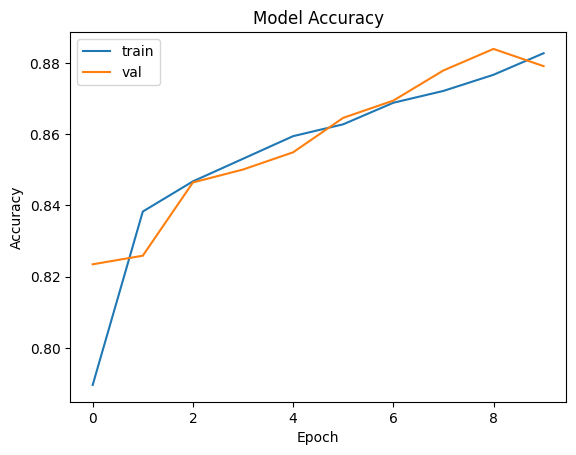

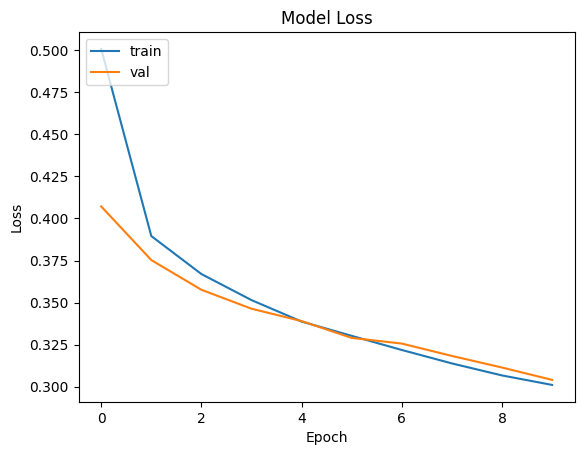

In [7]:

# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


26/26 [==============================] - 0s 2ms/step


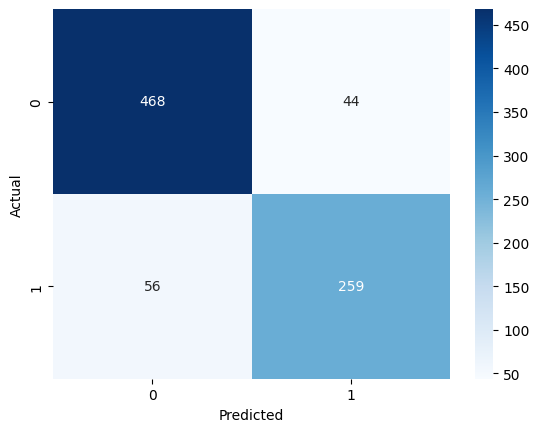

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 0.01
    if epoch > 5:
        lr = 0.001
    if epoch > 10:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/20
207/207 [==============================] - 2s 5ms/step - loss: 0.2978 - accuracy: 0.8827 - val_loss: 0.2844 - val_accuracy: 0.8912 - lr: 0.0100
Epoch 2/20
207/207 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.8927 - val_loss: 0.2588 - val_accuracy: 0.9008 - lr: 0.0100
Epoch 3/20
207/207 [==============================] - 1s 3ms/step - loss: 0.2506 - accuracy: 0.9033 - val_loss: 0.2584 - val_accuracy: 0.8972 - lr: 0.0100
Epoch 4/20
207/207 [==============================] - 1s 5ms/step - loss: 0.2442 - accuracy: 0.9069 - val_loss: 0.2393 - val_accuracy: 0.9021 - lr: 0.0100
Epoch 5/20
207/207 [==============================] - 1s 4ms/step - loss: 0.2328 - accuracy: 0.9105 - val_loss: 0.2777 - val_accuracy: 0.9033 - lr: 0.0100
Epoch 6/20
207/207 [==============================] - 1s 4ms/step - loss: 0.2356 - accuracy: 0.9111 - val_loss: 0.2874 - val_accuracy: 0.8888 - lr: 0.0100
Epoch 7/20
207/207 [==============================] - 1s 3ms/step - lo

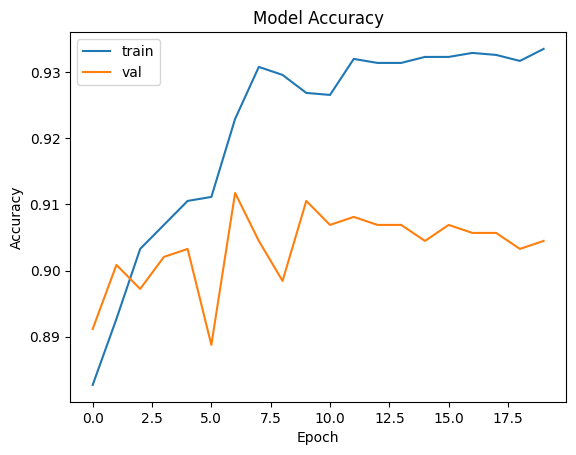

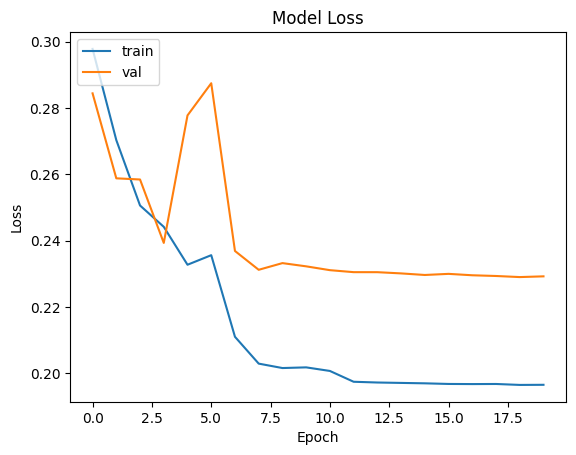

In [10]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

